# Car Price Prediction With Machine Learning

Task: The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

## Importing Dataset

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
# Display the first few rows of the 'iris' DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Get the dimensions
iris.shape

In [5]:
# Count missing values in each column
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
#display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Remove the 'Owner' column
df.drop('Owner',axis=1,inplace=True)

In [9]:
# Get the unique values in the 'Species' column
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

## Visualizing the Dataset

In [10]:
# Set the default Seaborn plotting style
sns.set()

### Pie Chart

In [11]:
fuel=df['Fuel_Type']
counts=len (fuel.unique())
print("The no of distinct fuel types=",counts)
print("Table of no of fuel count")
value_counts = df['Fuel_Type'].value_counts()
print(value_counts)

The no of distinct fuel types= 3
Table of no of fuel count
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


['Petrol' 'Diesel' 'CNG']


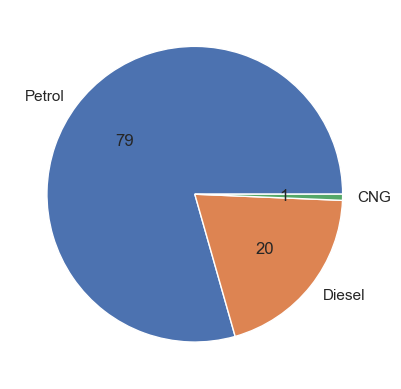

In [12]:
vector = []
for object, count in value_counts.items():
    vector.append(count)
f=fuel.unique()
print(f)
plt.pie(vector, labels=f, autopct="%1.0f")
plt.show()

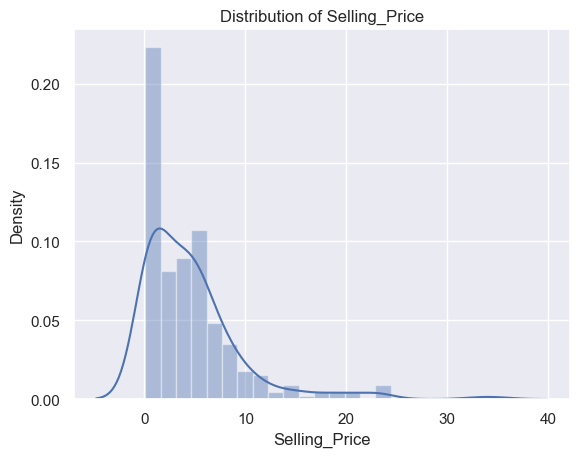

In [13]:
#distribution of the 'Selling_Price'
sns.distplot(df['Selling_Price'])
plt.xlabel('Selling_Price')
plt.ylabel('Density')
plt.title(f"Distribution of {'Selling_Price'}")
plt.show()

## PairPlot

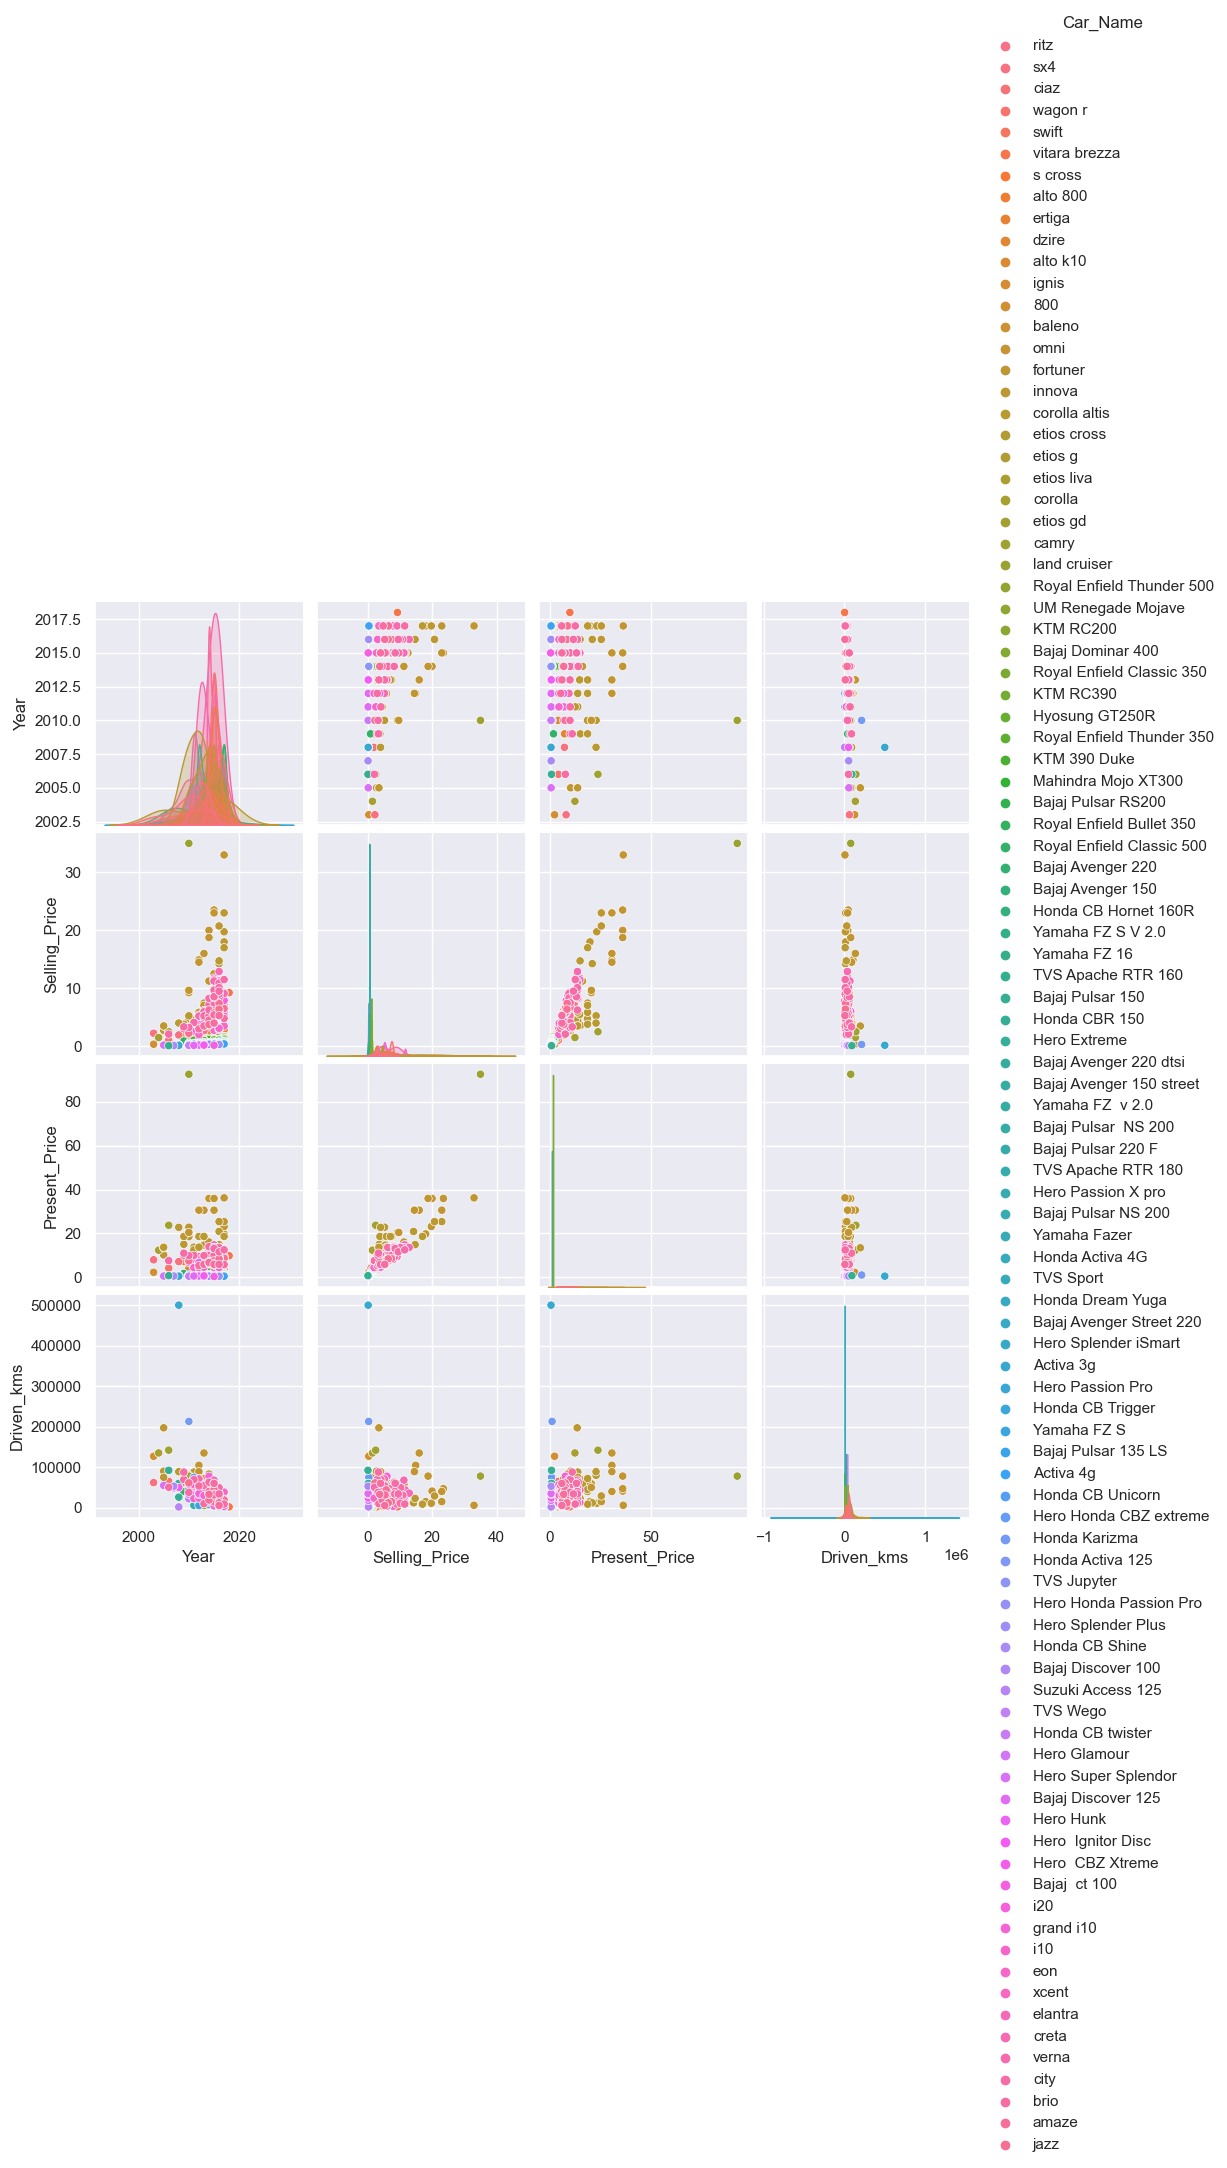

In [14]:
sns.pairplot(df,hue='Car_Name')

In [15]:
#compute the correlation
df.corr

<bound method DataFrame.corr of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  
0         Dealer       Manual  
1         Deale

## Heatmap

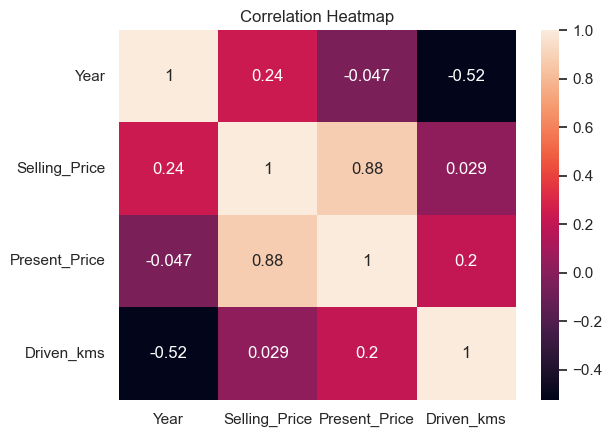

In [16]:
correlations = df.corr()
sns.heatmap(correlations, annot = True, cmap = "rocket")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Create a dictionary to map Fuel Type names to numerical labels
ft = {'Petrol':1,'Diesel':2,'CNG':3}

In [18]:
df['Fuel_Type'] = df['Fuel_Type'].map(ft)

In [19]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,Dealer,Manual
297,brio,2015,4.00,5.90,60000,1,Dealer,Manual
298,city,2009,3.35,11.00,87934,1,Dealer,Manual
299,city,2017,11.50,12.50,9000,2,Dealer,Manual


In [20]:
predict = "Selling_Price"
selected_features = ['Year',
                    'Selling_Price','Present_Price',
                    'Driven_kms','Fuel_Type']
df= df[selected_features]

In [21]:
# Splitting data
x = df.drop(predict, axis = 1).values
y= df[predict].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=45)

In [22]:
#Model training
model= DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [23]:
predictions = model.predict(x_test)

In [24]:
#Evaluate model
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.46721311475409844


In [25]:
#R^2 Score (Coefficient of determination)
r2_score= model.score(x_test, y_test)
print("R2 Score:", r2_score)

R2 Score: 0.9725875048547719


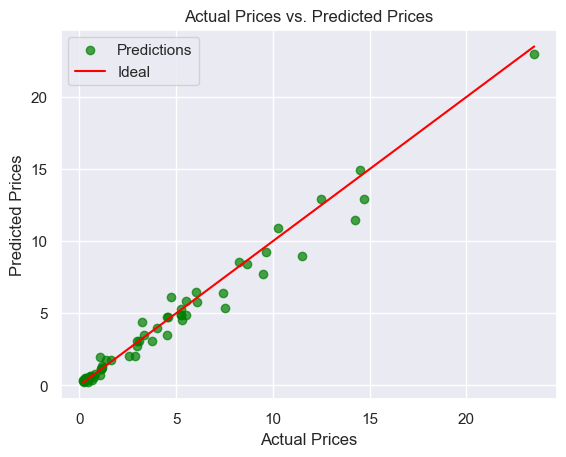

In [26]:
# Visualize predictions vs. actual values
plt.scatter (y_test, predictions, alpha = 0.7, color = 'green', label = 'Predictions')
plt.plot([min (y_test), max (y_test)], [min(y_test), max(y_test)], color = 'red', label = 'Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
plt.show()